In [169]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [170]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\seeds.csv', header = None)

In [171]:
data.shape

(210, 9)

In [172]:
data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7      int64
8     object
dtype: object

In [173]:
data.head()

,0,1,2,3,4,5,6,7,8
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat


In [174]:
X = data.iloc[:, 0:-2]
y = data.iloc[:,-1]

In [175]:
X.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [176]:
y.head()

0    Kama wheat
1    Kama wheat
2    Kama wheat
3    Kama wheat
4    Kama wheat
Name: 8, dtype: object

In [177]:
y.value_counts()

Kama wheat        70
Canadian wheat    70
Rosa wheat        70
Name: 8, dtype: int64

In [178]:
X.var()

0    8.466351
1    1.705528
2    0.000558
3    0.196305
4    0.142668
5    2.260684
6    0.241553
dtype: float64

In [179]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [180]:
mergings = linkage(X, method = 'complete')

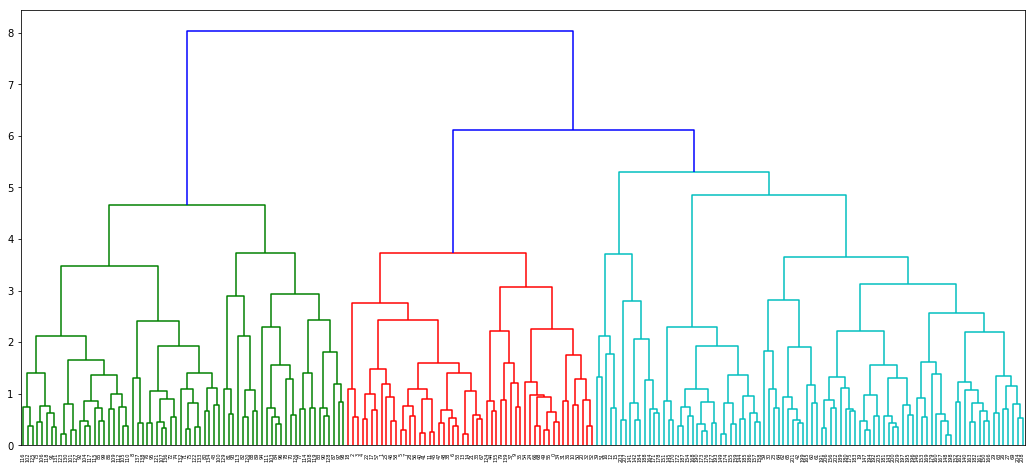

In [181]:
plt.figure(figsize=(18, 8))
dendrogram(mergings)
plt.show()

In [182]:
labels = fcluster(mergings, 6, criterion = 'distance')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [183]:
pd.crosstab(labels, y)

8,Canadian wheat,Kama wheat,Rosa wheat
row_0,,,
1,0,2,66
2,0,48,4
3,70,20,0


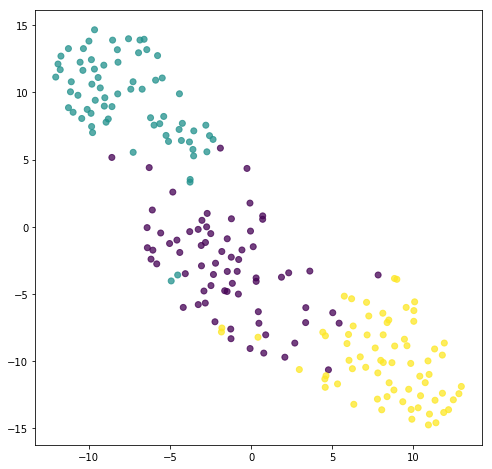

In [184]:
plt.figure(figsize=(8,8))
X_labels = data.iloc[:,-2]
tsne = TSNE(learning_rate = 100)
transformed = tsne.fit_transform(X)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c = X_labels, alpha = 0.75)
plt.show()

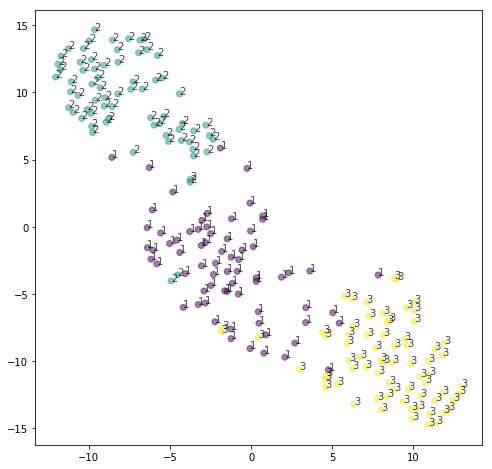

In [185]:
plt.figure(figsize=(8,8))
plt.scatter(xs, ys, c = X_labels, alpha = 0.5)
for x, y, label in zip(xs, ys, X_labels):
    plt.annotate(label, (x, y), fontsize = 10, alpha = 0.75)
plt.show()